In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.utils import shuffle
import random

In [ ]:
# Mounting Google Drive in Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Direktori dataset Seasonal Color
seasonal_color_directory = '/content/drive/MyDrive/smartfit/dataset/seasonal_color'

In [ ]:
# Path dataset Seasonal Color
dataset_path = '/content/drive/MyDrive/smartfit/dataset/seasonal_color'
target_dir = '/content/drive/MyDrive/smartfit/oversampled_seasonal_color'

classes = os.listdir(dataset_path)
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
print(f"Kelas dan jumlah gambar: {class_counts}")

Kelas dan jumlah gambar: {'winter': 113, 'autumn': 178, 'summer': 204, 'spring': 168}


In [ ]:
# Periksa jumlah gambar di setiap kelas
for category in os.listdir(seasonal_color_directory):
    category_path = os.path.join(seasonal_color_directory, category)
    if os.path.isdir(category_path):
        print(f"{category}: {len(os.listdir(category_path))} images")

winter: 113 images
autumn: 178 images
summer: 204 images
spring: 168 images


In [ ]:
max_samples = max(class_counts.values())
print(f"Jumlah gambar yang ditargetkan per kelas: {max_samples}")

Jumlah gambar yang ditargetkan per kelas: 204


In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.1
)

In [ ]:
oversampled_counts = {cls: len(os.listdir(os.path.join(target_dir, cls))) for cls in classes}
print(f"Jumlah gambar setelah oversampling: {oversampled_counts}")

Jumlah gambar setelah oversampling: {'winter': 205, 'autumn': 205, 'summer': 205, 'spring': 205}


In [ ]:
# Gunakan `target_dir` untuk data training dengan generator
data_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.1)

In [ ]:
# Generator untuk training data
train_gen = data_gen.flow_from_directory(
    directory=target_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 740 images belonging to 4 classes.


In [ ]:
# Generator untuk validation data
val_gen = data_gen.flow_from_directory(
    directory=target_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 80 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.3335 - loss: 1.5385 - val_accuracy: 0.2656 - val_loss: 1.4665
Epoch 2/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4688 - loss: 1.1844

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4688 - loss: 1.1844 - val_accuracy: 0.2500 - val_loss: 1.5582
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4429 - loss: 1.1914 - val_accuracy: 0.4062 - val_loss: 1.2394
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6250 - loss: 1.0123 - val_accuracy: 0.2500 - val_loss: 1.4364
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5171 - loss: 1.0956 - val_accuracy: 0.2969 - val_loss: 1.3720
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.5000 - loss: 1.1023 - val_accuracy: 0.1250 - val_loss: 1.5292
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4109 - loss: 1.1668 - val_accuracy: 0.3281 - val_loss: 1.3368
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.1418 - val_accuracy: 0.3750 - val_loss: 1.2930
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4383 - loss: 1.1249 - val_accuracy: 0.3438 - val_loss: 1.3084

In [ ]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.3680 - loss: 1.2669
Validation Loss: 1.2946971654891968
Validation Accuracy: 33.75%


In [ ]:
# Save Model
model.save('/content/drive/MyDrive/smartfit/models/seasonal_color_model_improved.h5')
print("Model saved successfully!")

Model saved successfully!


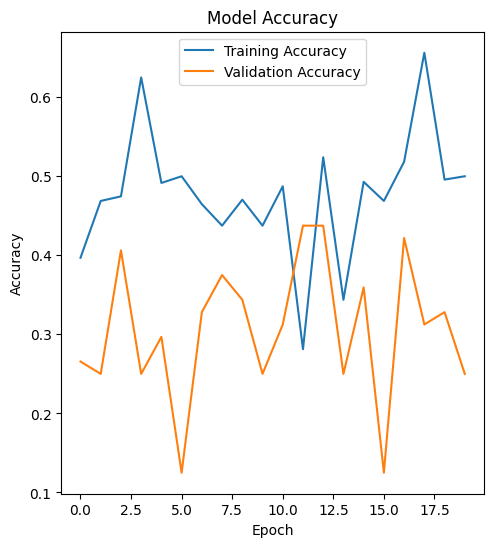

In [ ]:
# Visualize Training Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

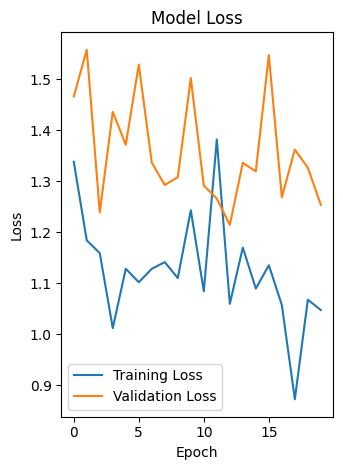

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()